In [1]:
import sys
sys.path.append('../')

import os
from data import datasets
from data.gene_graphs import GeneManiaGraph, OntologyGraph

import networkx as nx
import matplotlib, matplotlib.pyplot as plt
import numpy as np


In [108]:
dataset = datasets.TCGADataset()
G = OntologyGraph(neighbors=4,embeddings_name='el', randomize=False)
mapping = dict(zip(range(0, len(dataset.df.columns)), dataset.df.columns))
nx_graph = G.nx_graph
# nx_graph = nx.relabel_nodes(G.nx_graph, mapping)

Torrent name: HiSeqV2.gz, Size: 513.04MB
File verified recently. Assumed still correct. Set use_timestamp=False to check again.
 loading from cache file/auto/homes/mt675/gene-graph-conv-onto/data/graphs/ontology_el_4.adjlist.gz


In [109]:
zero_degree = ['PARK7', 'FOXA1', 'TFF1', 'BAX'] 
x = neighborsOf(nx_graph, zero_degree, zero_degree)

# zero_degree = ["ESR1"]
# y = neighborsOf(nx_graph, zero_degree, zero_degree)

print(x,y)

['DNTT', 'MDM4', 'PRDM15', 'BCL2L10', 'TP53AIP1', 'ESR1', 'FOXA3', 'BOK', 'TP53I3', 'MAP3K5', 'SERPINI1', 'AC048338.2', 'S100B', 'S100A12', 'EPO', 'BECN1', 'BCL2', 'TFF3', 'STK11', 'TP73', 'LYPD6B', 'F7', 'BCL2A1', 'TP53INP1', 'PRKAG3', 'TP53', 'MCL1', 'LRIG1', 'BCL2L11', 'BAK1', 'TFF2', 'FST', 'IL4R', 'RTL10', 'BMF', 'NCOA7', 'BIRC6', 'PPP1R13L', 'HNF4A', 'DYRK2', 'MSTN', 'KPTN', 'FOXE1', 'SOD1', 'CTF1', 'AC005726.1'] ['TP53INP1', 'PRDM15', 'OTUB2', 'HMGB1', 'BAX', 'WWOX', 'GREB1', 'BCL3', 'CEBPB', 'NCOA7', 'NR0B1', 'MYC', 'TRIM59', 'STK11', 'RIOX2', 'FOXA1', 'PARK7', 'EID2', 'TFF1']


In [91]:
nx_graph = G.nx_graph

In [92]:
bfs = nx.bfs_edges(nx_graph, "ESR1")

In [93]:
def neighborsOf(graph, nodes, excludes):
    neighbors = set()
    for x in nodes:
        neighbors = neighbors.union(set(graph.neighbors(x)))
    return list(neighbors.difference(set(excludes)))

def removeEdgesBetween(graph, nodes):
    for n1 in nodes:
        for n2 in nodes:
            if graph.has_edge(n1,n2):
                graph.remove_edge(n1,n2)

In [111]:
zero_degree = ["ESR1"]
print(zero_degree)
first_degree = neighborsOf(nx_graph, zero_degree, zero_degree)[:2] 
print(first_degree)
# first_degree = first_degree.difference(zero_degree)
second_degree = neighborsOf(nx_graph, first_degree, first_degree)[:10]
second_degree = list(set(second_degree) - set(zero_degree)- set(first_degree))[:14] + ['TP53']
print(second_degree)
third_degree = neighborsOf(nx_graph, second_degree, second_degree)
third_degree = list(set(third_degree) - set(first_degree)  - set(zero_degree))[:20]
third_degree = []
print(third_degree)

['ESR1']
['TP53INP1', 'PRDM15', 'PARK7', 'FOXA1', 'TFF1', 'BAX']
['PRKAG3', 'MDM4', 'DNTT', 'TP53AIP1', 'BCL2L10', 'FOXA3', 'LRIG1', 'BOK', 'TP53I3', 'MAP3K5', 'TFF2', 'ABCA3', 'FST', 'SOD1', 'TP53']
[]


In [113]:
toremove = set(nx_graph.nodes())
toremove = toremove.difference(zero_degree).difference(first_degree).difference(second_degree).difference(third_degree)
nx_graph.remove_nodes_from(toremove)

In [114]:
removeEdgesBetween(nx_graph, first_degree)
removeEdgesBetween(nx_graph, second_degree)
removeEdgesBetween(nx_graph, third_degree)
removeEdgesBetween(nx_graph, first_degree + third_degree)
removeEdgesBetween(nx_graph, zero_degree + second_degree)
removeEdgesBetween(nx_graph, zero_degree + third_degree)

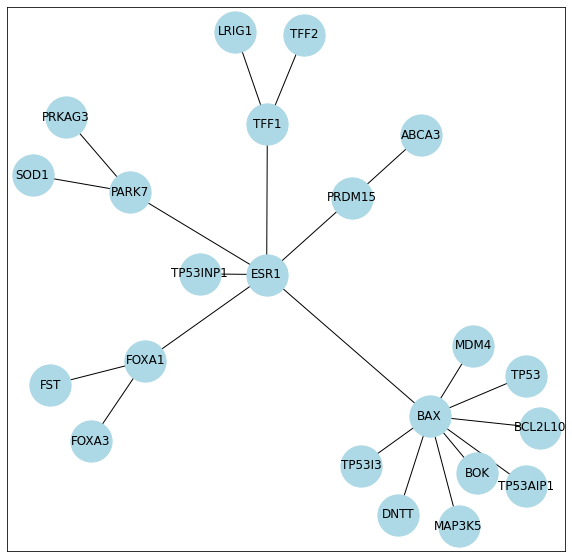

In [125]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
shells = [zero_degree, first_degree, second_degree, third_degree]
cmap = matplotlib.cm.get_cmap('Spectral')
pos = nx.spring_layout(nx_graph, k=0.1)
#pos = nx.shell_layout(nx_graph, shells, scale=100)
# pos = nx.circular_layout(nx_graph)

nx.draw_networkx(nx_graph, pos, node_color="lightblue",with_labels=True, node_size=1700)


In [98]:
print(zero_degree)

['ESR1']


(-5.385275912284852, 5.494536948204042, -5.46987099647522, 5.46987099647522)

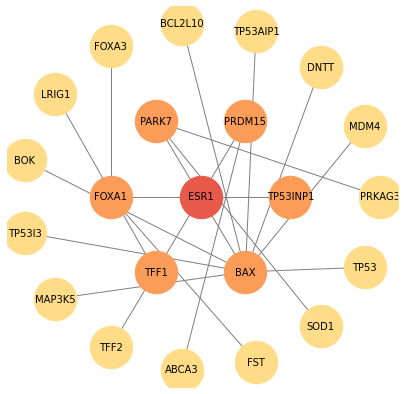

In [133]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 7)
shells = [zero_degree, first_degree, second_degree, third_degree]
cmap = matplotlib.cm.get_cmap('Spectral')
#pos = nx.spring_layout(nx_graph, k=0.3)
pos = nx.shell_layout(nx_graph, shells, scale=10)
#pos = nx.circular_layout(G)



#nx.draw_networkx(G, pos, node_color="lightblue",with_labels=True, node_size=1000)

nx.draw_networkx_nodes(nx_graph,pos,nodelist=zero_degree, with_labels=True, node_size=1800,node_color=cmap(40))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=first_degree, with_labels=True, node_size=1800,node_color=cmap(70))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=second_degree, node_size=1800,node_color=cmap(100))

# nx.draw_networkx_nodes(nx_graph,pos,nodelist=third_degree, node_size=1500,node_color=cmap(150))

nx.draw_networkx_edges(nx_graph,pos, edge_color="gray");

nx.draw_networkx_labels(nx_graph,pos,font_size=10);
plt.axis('off')